<a href="https://colab.research.google.com/github/MuhammadIrzam447/MultiModel/blob/master/Valid_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !gdown https://drive.google.com/uc?id=1F0-cWEZb32grArL7vBzqLwf_l_yF1EkT

In [2]:
# %cd /content/Dataset(s)

In [3]:
# !unzip /content/test.zip

In [4]:
from google.colab import drive
import pandas as pd
import os
from PIL import Image
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import UnidentifiedImageError
from sklearn.metrics import classification_report

In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [6]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Loading Validation Dataset and Preprocessing

In [7]:
# save_dir = '/content/Model/Fused_ResNetmodel_Hatefull_Experiment#5'
# load_path = os.path.join(save_dir, 'model.pth')

# # Create an instance of the ResNet model
# resnet = torchvision.models.resnet101(pretrained=False)
# resnet.fc = nn.Linear(2048, 2) # Choose the number of output classses as per your model

# # Load the saved model parameters
# # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
# resnet.load_state_dict(torch.load(load_path))

# # Set the model to evaluation mode and respective device
# resnet.eval()
# resnet.to(device)

In [8]:
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.dataset = datasets.ImageFolder(data_dir, transform=val_transform)
        self.classes = sorted(os.listdir(data_dir))
        self.class_lengths = self._compute_class_lengths()

    def _compute_class_lengths(self):
        class_lengths = {cls: 0 for cls in self.classes}

        for cls in self.classes:
            cls_dir = os.path.join(self.data_dir, cls)
            if os.path.isdir(cls_dir):
                class_lengths[cls] = len(os.listdir(cls_dir))

        return class_lengths

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, label

    def __len__(self):
        return len(self.dataset)

In [10]:
valPath = "/content/Dataset(s)/fused-food-101-test"
val_dataset = ValidationDataset(valPath)

In [11]:
batch_size = 32
validation_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [12]:
print("Number of samples:", len(val_dataset))
print("Number of classes:", len(val_dataset.classes))

Number of samples: 22716
Number of classes: 101


In [13]:
num_batches = len(validation_data_loader)
print("Number of batches:", num_batches)

Number of batches: 710


# Validation

In [14]:
epoch = 11
save_dir = '/content/Model/Models-Train-01/'
while epoch < 20:
    model_name = str(epoch+1) + "_model.pth"
    load_path = os.path.join(save_dir, model_name)

    # Create an instance of the ResNet model
    resnet = torchvision.models.resnet101(pretrained=False)
    resnet.fc = nn.Linear(2048, 101) # Choose the number of output classses as per your model

    # Load the saved model parameters
    # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
    resnet.load_state_dict(torch.load(load_path))

    # Set the model to evaluation mode and respective device
    resnet.eval()
    resnet.to(device)

    # resnet.eval()

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for images, labels in validation_data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = resnet(images)

            # Get the predicted labels
            _, predicted_label = torch.max(outputs, 1)

            # Store the predicted and true labels
            predicted_classes.extend(predicted_label.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

        accuracy = accuracy_score(actual_labels, predicted_classes)
        precision = precision_score(actual_labels, predicted_classes, average='weighted')
        recall = recall_score(actual_labels, predicted_classes, average='weighted')
        f1 = f1_score(actual_labels, predicted_classes, average='weighted')

        print("Result with model " + model_name + " : ")
        print("=========================================")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print(classification_report(actual_labels, predicted_classes))
        epoch = epoch + 1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 12_model.pth : 
Accuracy: 0.9105476316252862
Precision: 0.9110015068871072
Recall: 0.9105476316252862
F1-score: 0.910309857316701
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       234
           1       0.95      0.95      0.95       221
           2       0.96      0.96      0.96       226
           3       0.86      0.86      0.86       222
           4       0.66      0.71      0.69       225
           5       0.94      0.93      0.94       224
           6       0.95      0.92      0.93       224
           7       0.95      0.92      0.93       225
           8       0.92      0.98      0.95       226
           9       0.85      0.91      0.88       214
          10       0.93      0.96      0.94       231
          11       0.90      0.97      0.93       227
          12       0.97      0.92      0.94       230
          13       0.93      0.97      0.95       220
          14       0.97      0.92      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 13_model.pth : 
Accuracy: 0.908698714562423
Precision: 0.9092580238830359
Recall: 0.908698714562423
F1-score: 0.908462925440964
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       234
           1       0.93      0.96      0.94       221
           2       0.93      0.97      0.95       226
           3       0.72      0.91      0.80       222
           4       0.73      0.66      0.69       225
           5       0.93      0.95      0.94       224
           6       0.96      0.92      0.94       224
           7       0.94      0.91      0.93       225
           8       0.90      0.98      0.94       226
           9       0.89      0.90      0.89       214
          10       0.96      0.94      0.95       231
          11       0.92      0.96      0.94       227
          12       0.94      0.93      0.94       230
          13       0.93      0.96      0.94       220
          14       0.95      0.93      0.94

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 14_model.pth : 
Accuracy: 0.9107677407994366
Precision: 0.9113176406855494
Recall: 0.9107677407994366
F1-score: 0.9105952274995075
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       234
           1       0.93      0.95      0.94       221
           2       0.95      0.98      0.96       226
           3       0.79      0.90      0.84       222
           4       0.69      0.70      0.70       225
           5       0.95      0.95      0.95       224
           6       0.93      0.91      0.92       224
           7       0.97      0.90      0.93       225
           8       0.92      0.98      0.95       226
           9       0.87      0.88      0.88       214
          10       0.96      0.96      0.96       231
          11       0.88      0.95      0.91       227
          12       0.94      0.93      0.94       230
          13       0.93      0.97      0.95       220
          14       0.94      0.94      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 15_model.pth : 
Accuracy: 0.9108998063039268
Precision: 0.9111242238275337
Recall: 0.9108998063039268
F1-score: 0.9106393433768147
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       234
           1       0.93      0.96      0.95       221
           2       0.96      0.98      0.97       226
           3       0.81      0.89      0.85       222
           4       0.71      0.67      0.69       225
           5       0.93      0.96      0.95       224
           6       0.94      0.92      0.93       224
           7       0.94      0.91      0.93       225
           8       0.94      0.98      0.96       226
           9       0.89      0.89      0.89       214
          10       0.93      0.96      0.95       231
          11       0.93      0.95      0.94       227
          12       0.96      0.92      0.94       230
          13       0.95      0.95      0.95       220
          14       0.97      0.92      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 16_model.pth : 
Accuracy: 0.9111639373129072
Precision: 0.9111268277909752
Recall: 0.9111639373129072
F1-score: 0.9107555902733985
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       234
           1       0.93      0.96      0.95       221
           2       0.94      0.98      0.96       226
           3       0.84      0.90      0.87       222
           4       0.73      0.65      0.69       225
           5       0.95      0.95      0.95       224
           6       0.96      0.90      0.93       224
           7       0.95      0.92      0.94       225
           8       0.95      0.98      0.96       226
           9       0.91      0.89      0.90       214
          10       0.93      0.96      0.95       231
          11       0.90      0.96      0.93       227
          12       0.94      0.94      0.94       230
          13       0.95      0.94      0.94       220
          14       0.92      0.93      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 17_model.pth : 
Accuracy: 0.9105916534601162
Precision: 0.9108483961716285
Recall: 0.9105916534601162
F1-score: 0.9103682068377612
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       234
           1       0.95      0.95      0.95       221
           2       0.97      0.96      0.96       226
           3       0.84      0.90      0.87       222
           4       0.66      0.70      0.68       225
           5       0.94      0.94      0.94       224
           6       0.96      0.89      0.93       224
           7       0.94      0.92      0.93       225
           8       0.94      0.98      0.96       226
           9       0.89      0.89      0.89       214
          10       0.94      0.95      0.95       231
          11       0.93      0.95      0.94       227
          12       0.97      0.93      0.95       230
          13       0.96      0.95      0.96       220
          14       0.96      0.93      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 18_model.pth : 
Accuracy: 0.9101074132769854
Precision: 0.9100338014108487
Recall: 0.9101074132769854
F1-score: 0.9097106233050827
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       234
           1       0.96      0.95      0.95       221
           2       0.96      0.97      0.97       226
           3       0.83      0.91      0.87       222
           4       0.71      0.65      0.68       225
           5       0.93      0.95      0.94       224
           6       0.95      0.89      0.92       224
           7       0.93      0.91      0.92       225
           8       0.94      0.98      0.96       226
           9       0.91      0.87      0.89       214
          10       0.95      0.95      0.95       231
          11       0.91      0.97      0.94       227
          12       0.97      0.92      0.95       230
          13       0.93      0.96      0.95       220
          14       0.94      0.94      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 19_model.pth : 
Accuracy: 0.9110318718084169
Precision: 0.9112011249204439
Recall: 0.9110318718084169
F1-score: 0.9108198611578956
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       234
           1       0.93      0.95      0.94       221
           2       0.96      0.97      0.96       226
           3       0.87      0.90      0.88       222
           4       0.70      0.69      0.69       225
           5       0.97      0.93      0.95       224
           6       0.92      0.92      0.92       224
           7       0.97      0.91      0.94       225
           8       0.94      0.97      0.96       226
           9       0.89      0.88      0.89       214
          10       0.90      0.96      0.93       231
          11       0.89      0.96      0.93       227
          12       0.95      0.93      0.94       230
          13       0.95      0.96      0.95       220
          14       0.96      0.93      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 20_model.pth : 
Accuracy: 0.9108998063039268
Precision: 0.9110288705714527
Recall: 0.9108998063039268
F1-score: 0.9106321517430642
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       234
           1       0.94      0.95      0.95       221
           2       0.94      0.97      0.96       226
           3       0.81      0.92      0.86       222
           4       0.74      0.68      0.71       225
           5       0.91      0.96      0.93       224
           6       0.96      0.89      0.93       224
           7       0.95      0.91      0.93       225
           8       0.94      0.98      0.96       226
           9       0.89      0.88      0.88       214
          10       0.95      0.95      0.95       231
          11       0.92      0.96      0.94       227
          12       0.96      0.94      0.95       230
          13       0.94      0.96      0.95       220
          14       0.96      0.91      0

In [15]:
accuracy = accuracy_score(actual_labels, predicted_classes)
precision = precision_score(actual_labels, predicted_classes, average='weighted')
recall = recall_score(actual_labels, predicted_classes, average='weighted')
f1 = f1_score(actual_labels, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9108998063039268
Precision: 0.9110288705714527
Recall: 0.9108998063039268
F1-score: 0.9106321517430642


In [16]:
print(classification_report(actual_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       234
           1       0.94      0.95      0.95       221
           2       0.94      0.97      0.96       226
           3       0.81      0.92      0.86       222
           4       0.74      0.68      0.71       225
           5       0.91      0.96      0.93       224
           6       0.96      0.89      0.93       224
           7       0.95      0.91      0.93       225
           8       0.94      0.98      0.96       226
           9       0.89      0.88      0.88       214
          10       0.95      0.95      0.95       231
          11       0.92      0.96      0.94       227
          12       0.96      0.94      0.95       230
          13       0.94      0.96      0.95       220
          14       0.96      0.91      0.94       231
          15       0.97      0.92      0.94       227
          16       0.78      0.75      0.77       224
          17       0.91    

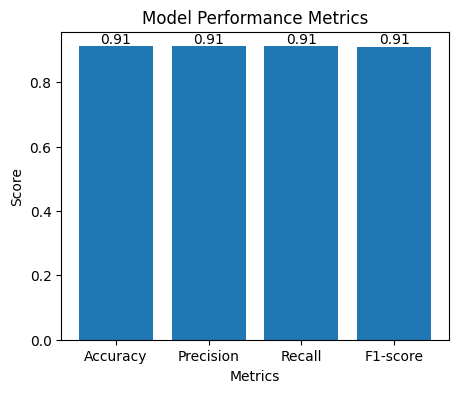

In [17]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(x, values)

# labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# scores on top of each bar
for i, bar in enumerate(bars):
    score = values[i]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()

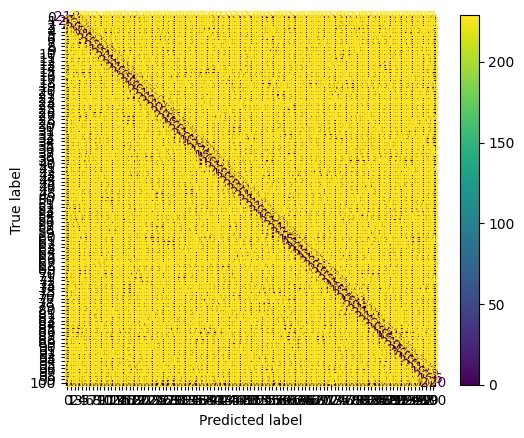

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, predicted_classes)
ConfusionMatrixDisplay(cm).plot()

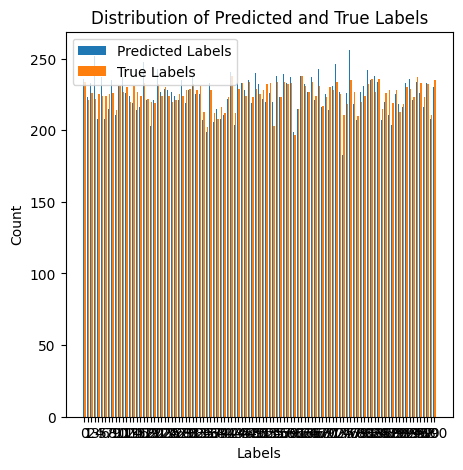

In [19]:
# Count the occurrences of each label in predicted and true labels
predicted_counts = np.bincount(predicted_classes)
true_counts = np.bincount(actual_labels)

# Get the unique labels
labels = np.unique(np.concatenate((predicted_classes, actual_labels)))

# Set the x-axis range
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35

# Plot the predicted and true label counts
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x - width/2, predicted_counts, width, label='Predicted Labels')
ax.bar(x + width/2, true_counts, width, label='True Labels')

# Add labels, title, and legend
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Predicted and True Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()